In [2]:
import os
import pickle
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline 

from scipy.stats import spearmanr
from collections import defaultdict, Counter


from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import SparsePCA



#import dataframe_image as dfi

In [25]:
np.random.seed(42)

In [3]:
#load the nsubj_space to get properties names
sspace_nsubj = pd.read_csv("..\\Data\\Semantic_Spaces\\sspace_spr2_nsubj.csv", index_col = "Token.Sent")
properties = sspace_nsubj.columns.tolist()

In [26]:
#load embeddings to predict
bb_ac_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_babyBERTa-2.pkl", "rb")) 
#load regressor
bb_regr = joblib.load(open("..\\Regressors\\pls_regr_babyBERTa.pkl", "rb"))

#make prediciton
y = np.array(list(bb_ac_embs.values()))
y_hat = bb_regr.predict(y)

#make prediction dataframe
bb_predictions = pd.DataFrame(y_hat, columns = properties).set_axis(list(bb_ac_embs.keys()))

In [5]:
from LeL_utils import train_regressor

In [28]:
bb_predictions.apply(lambda x:(x-x.min())/(x.max()-x.min()))

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,0.269052,0.608970,0.871891,0.298313,0.210615,0.402623,0.170185,0.274674,0.400081,0.227642,0.255626,0.599919,0.248916,0.169178
break.1,0.732039,0.710941,0.935752,0.549175,0.739415,0.190432,0.594655,0.628338,0.940463,0.691318,0.571220,0.724217,0.725750,0.512861
bend.2,0.424692,0.404879,0.427348,0.654488,0.400147,0.521470,0.449263,0.324703,0.328030,0.361909,0.318719,0.298030,0.382112,0.329258
bend.3,0.458426,0.405167,0.524520,0.588358,0.433239,0.397396,0.452109,0.382413,0.430732,0.407703,0.385050,0.349584,0.426629,0.369246
bake.4,0.294402,0.521135,0.418811,0.562710,0.315355,0.637747,0.325013,0.266181,0.244134,0.236836,0.231682,0.427759,0.260732,0.267058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.663588,0.265449,0.639228,0.581722,0.709603,0.325469,0.631995,0.538805,0.797622,0.630823,0.530684,0.254681,0.638910,0.538214
smash.96,0.430165,0.515541,0.397795,0.543572,0.400042,0.610627,0.475164,0.348845,0.440720,0.371278,0.334776,0.476655,0.387663,0.350571
smash.97,0.661721,0.746245,0.634507,0.634333,0.650053,0.559620,0.652165,0.498849,0.815754,0.594100,0.439211,0.704893,0.624362,0.458020
macerate.98,0.233088,0.337332,0.524696,0.324417,0.261207,0.504947,0.209382,0.174765,0.201847,0.192693,0.200666,0.340945,0.201992,0.176185


In [41]:
#load embeddings to predict
gpt2xl_ac_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_GPT2-XL.pkl", "rb")) 
#load regressor
gpt2xl_ac_embs= pd.DataFrame(gpt2xl_ac_embs).T.apply(lambda x:(x-x.min())/(x.max()-x.min()))
gpt2xl_regr = joblib.load(open("..\\Regressors\\pls_regr_GPT2-XL.pkl", "rb"))

#make prediciton
y = gpt2xl_ac_embs.values
y_hat = gpt2xl_regr.predict(y)

#make prediction dataframe
gpt2xl_predictions = pd.DataFrame(y_hat, columns = properties).set_axis(list(bb_ac_embs.keys()))

In [42]:
gpt2xl_predictions.apply(lambda x:(x-x.min())/(x.max()-x.min()))

,awareness,change_of_location,change_of_possession,change_of_state,change_of_state_continuous,existed_after,existed_before,existed_during,instigation,partitive,sentient,volition,was_for_benefit,was_used
break.0,0.208875,0.333090,0.119144,0.381416,0.216525,0.956105,0.305504,0.327372,0.259602,0.180132,0.337225,0.321739,0.199451,0.470593
break.1,0.741735,0.688061,0.520331,0.467770,0.689821,0.568247,0.680957,0.731284,0.698802,0.751299,0.690582,0.696366,0.737711,0.472439
bend.2,0.249117,0.266624,0.357358,0.381811,0.261094,0.623507,0.253327,0.299600,0.222143,0.244232,0.302945,0.244807,0.251683,0.338239
bend.3,0.556631,0.598886,0.652674,0.460852,0.464221,0.540850,0.482777,0.469402,0.443003,0.548441,0.407692,0.571220,0.545747,0.217301
bake.4,0.000000,0.195152,0.375285,0.175354,0.000000,0.720102,0.009341,0.085413,0.059255,0.005688,0.067677,0.167508,0.000000,0.214138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revolve.95,0.454875,0.147541,0.478381,0.722525,0.456561,0.312727,0.384055,0.570123,0.369685,0.489322,0.578379,0.136222,0.486767,0.634045
smash.96,0.073776,0.254488,0.295160,0.283598,0.101340,0.795315,0.121811,0.088613,0.126182,0.050553,0.079147,0.241570,0.059289,0.224960
smash.97,0.564596,0.239481,0.514508,0.566601,0.568790,0.439292,0.493588,0.563092,0.573989,0.606897,0.601498,0.245113,0.590965,0.606011
macerate.98,0.170732,0.098673,0.460575,0.509956,0.190427,0.476575,0.159679,0.231309,0.134013,0.171785,0.222358,0.073009,0.177959,0.339200


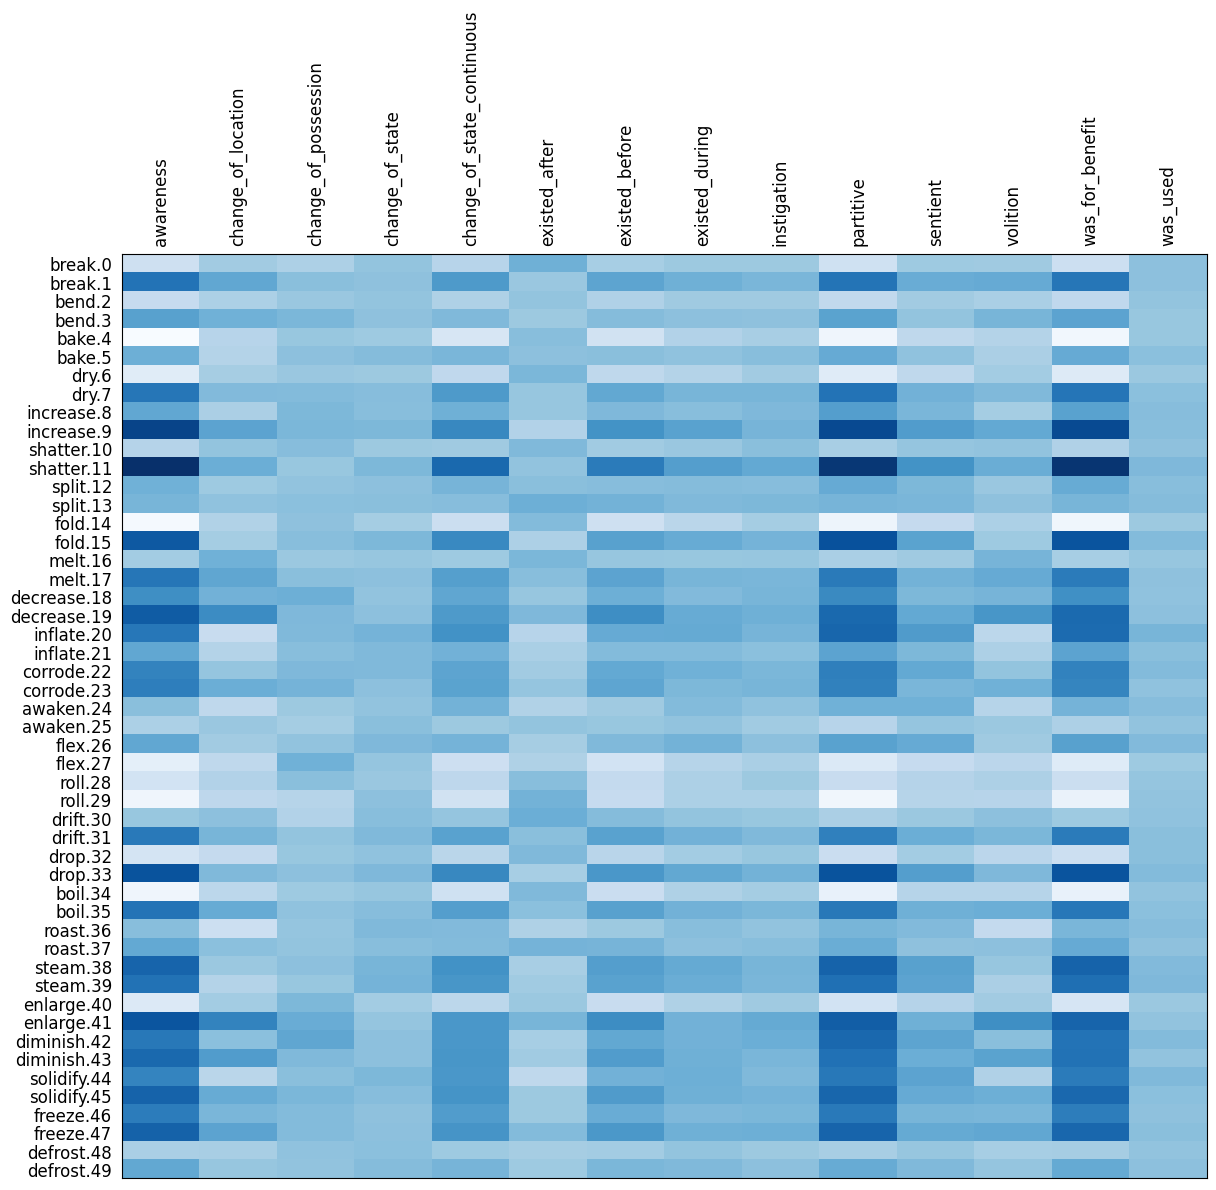

In [43]:
plt.figure(figsize=(14, 12))

# creaiamo una colormpa divergente in scala di grigi

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

maxv = 0

for mat in gpt2xl_predictions.values[:50]:    
    maxv = max(maxv, max(mat.max(), - mat.min())) # si può eliminare con 'Blues'

#heatmap object
heatmap = plt.imshow(gpt2xl_predictions.values[:50], cmap = 'Blues', 
                    interpolation= 'nearest',
                    aspect='auto' )


plt.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelsize=12)  # eliminiamo i tick 

plt.yticks(range(0,len(gpt2xl_predictions.index[:50])), gpt2xl_predictions.index[:50], fontsize=12)

plt.tick_params(labelbottom = False, labeltop = True)
plt.xticks(range(0,len(gpt2xl_predictions.columns)), gpt2xl_predictions.columns, rotation = 'vertical')
plt.show()